<a href="https://colab.research.google.com/github/jiiinchoi/MAI-Lab./blob/main/facedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""from google.colab import drive
drive.mount('/content/drive')"""

# 구글 마운트 안하고 파일 업로드 했습니다!

"from google.colab import drive\ndrive.mount('/content/drive')"

In [2]:
import cv2
from google.colab.patches import cv2_imshow

In [3]:
import os

In [5]:
# Haar Cascade 파일 경로
cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'

if os.path.exists(cascade_path):
  print("Path exist~!")
else:
  print("Path does not exist:", cascade_path)


Path exist~!


In [6]:
# 이미지 읽기
import os

image_path = '/content/pknu_student_img.jpg'
if os.path.exists(image_path):
  img = cv2.imread(image_path)
else:
  print("Path does not exist:", image_path)

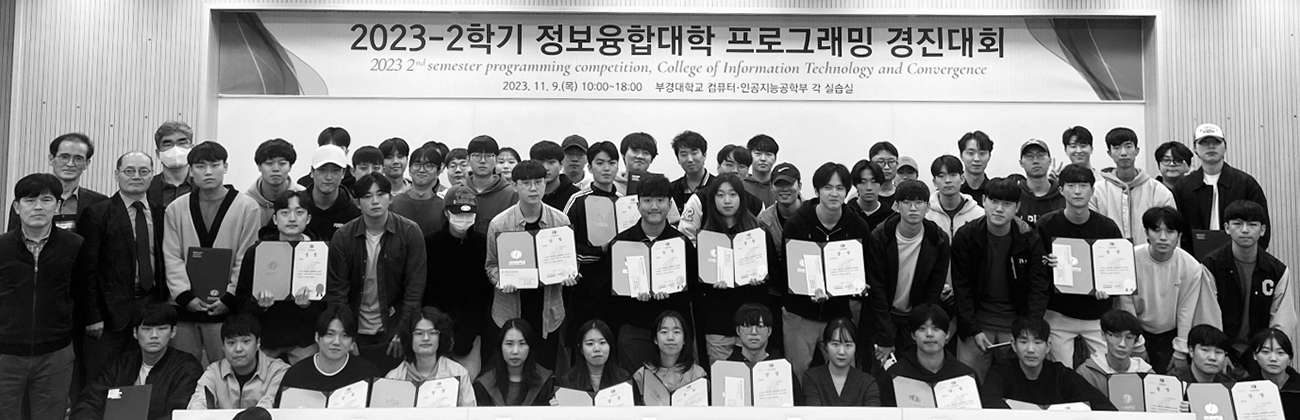

In [7]:
# 그레이스케일 변환 why? : Haar 얼굴 검출은 색상이 아니라 밝기 변화(명암차이)를 이용해서 얼굴을 찾기 때문
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# 얼굴 검출 (face detection) cascade classifier 이용 위해 객체 생성

In [8]:
face_cascade = cv2.CascadeClassifier(cascade_path) # 미리 학습된 모델 불러오기

In [13]:
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, # 얼굴 탐색을 위해 이미지 스케일을 얼마나 촘촘하게 줄여가며 검사할지
                                      minNeighbors=4,   # 동일 위치에서 검출된 얼굴 후보 박스가 몇 개 이상 겹쳐야 얼굴로 인정할지
                                      minSize=(30, 30))  # 이 크기보다 작은 영역은 얼굴로 검출하지 않음

# 검출된 얼굴 주변에 사각형 그리기!

In [15]:
# (x, y) : 얼굴 왼쪽 위 좌표
# (w, h) : 얼굴 너비(width), 높이(height)
# (x+w, y+h) : 사각형 끝점 (오른쪽 아래!)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

# 출력

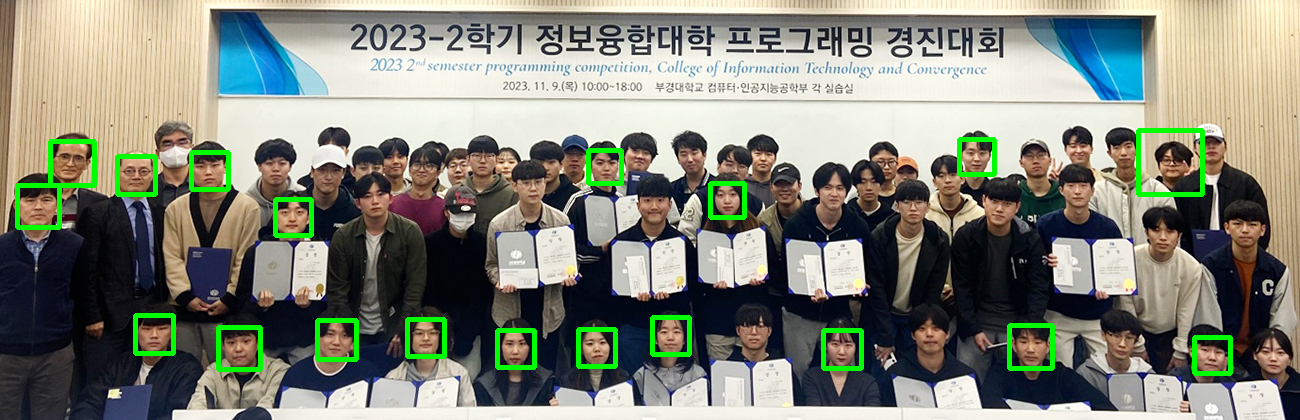

In [16]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
print("검출된 얼굴 수:", len(faces))


검출된 얼굴 수: 19


(a) 현재 검출 방식(Haar) 장단점 한 줄씩

 장점: 연산이 빨라서 CPU만으로도 얼굴 검출을 쉽게 해볼 수 있다.

 단점: 조명이나 얼굴 크기, 각도가 조금만 달라져도 오검출이 생기기 쉽다.



---


(b) 핵심 파라미터 2개 이상 설명 + 기본값/의미


1.   scaleFactor : 얼굴 탐색을 위해 이미지 스케일을 얼마나 촘촘하게 줄여가며 검사할지
2.   minNeighbors: 동일 위치에서 검출된 얼굴 후보 박스가 몇 개 이상 겹쳐야 얼굴로 인정할지
3. minSize: 이 크기보다 작은 영역은 얼굴로 검출하지 않음


(c) 거짓 양성/거짓 음성이 언제 생기는지, 본인이 본 사례 1줄
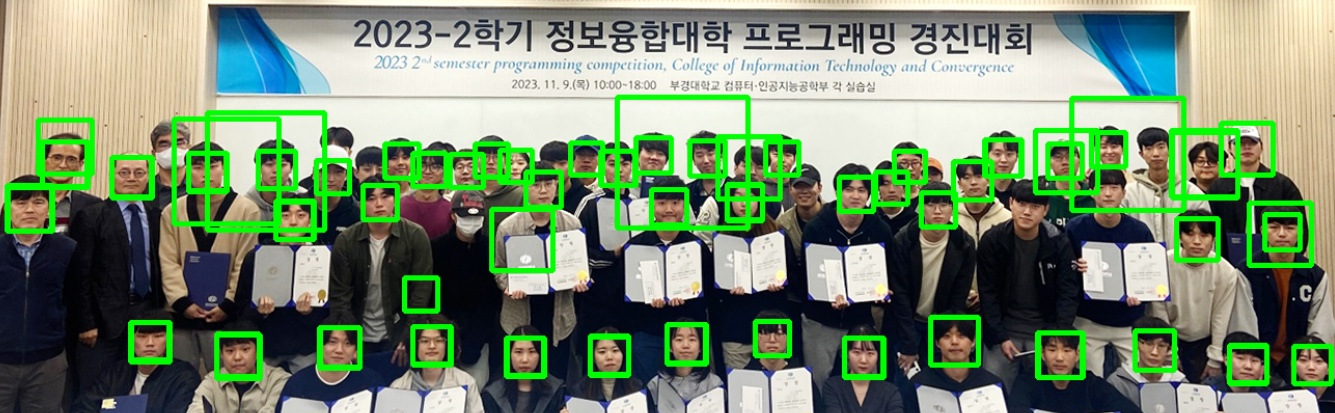

단체 사진에서 얼굴이 아닌 상장이나 배경 일부가 얼굴로 검출되는 경우가 있었고 겹쳐져 있는 얼굴은 잘 검출이 안되었다.
추가한 사진은 scaleFactor를 1.01로, minNeighbors를 3으로 설정했을 때 동일 얼굴이 여러 스케일에서 반복 검출되면서 중복 박스와 오검출이 많이 발생하였다.


---


(d) 개선 아이디어 2개


1.  DNN기반으로 얼굴 검출 모델을 사용하면 정확도가 높아질 것이다.
2.  검출 전에 blur를 적용해서 노이즈를 줄인다?

